### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

In [5]:
df = pd.read_csv('/home/datascience/Prices_sample.csv')

In [18]:
df.describe()

,Year,Quarter,Quantity,Price
count,91.000000,91.000000,91.000000,91.000000
mean,1987.879121,2.483516,18.403309,250.440293
std,6.604435,1.119153,1.813343,37.010231
min,1977.000000,1.000000,15.891500,142.166700
25%,1982.000000,1.500000,17.043950,231.333350
50%,1988.000000,2.000000,18.167800,250.100000
75%,1993.500000,3.000000,19.358650,280.716700
max,1999.000000,4.000000,23.405400,300.400000


/home/datascience/conda/dataexpl_p37_cpu_v3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


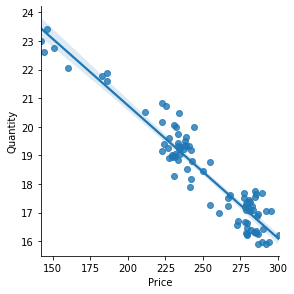

In [9]:
sns.lmplot(x = "Price", y = "Quantity", data = df, size = 4)

In [10]:
model = ols("Quantity ~ Price", data = df).fit()

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.69e-46
Time:                        19:26:35   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

In [17]:
model.params[0]

30.051485828783246

In [31]:
#preco = [i for i in range(142, 390, 5)]
preco = [320, 330, 340, 350, 360, 370, 380, 390]

In [32]:
custo = 80

In [33]:
vendas = []
for i in preco:
    quant_demanda = model.params[0] - model.params[1] * i
    vendas.append((i-custo) * quant_demanda)

In [34]:
lucro = pd.DataFrame({"Preco": preco, "Vendas": vendas})

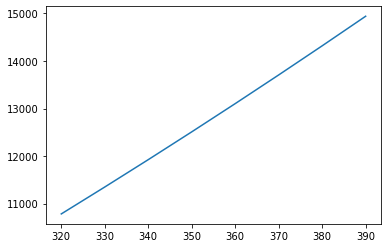

In [35]:
plt.plot(lucro.Preco, lucro.Vendas)